            range       Usage
count  145.000000  145.000000
mean    72.000000   60.172414
std     42.001984    7.846040
min      0.000000   44.000000
25%     36.000000   54.000000
50%     72.000000   60.000000
75%    108.000000   65.000000
max    144.000000   83.000000


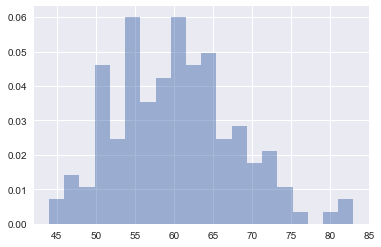

       range       date      time  Usage
index                                   
0          0 2017-10-04  13:20:00     68
1          1 2017-10-04  13:10:00     50
2          2 2017-10-04  13:00:00     58
3          3 2017-10-04  12:50:00     64
4          4 2017-10-04  12:40:00     65
5          5 2017-10-04  12:30:00     51
6          6 2017-10-04  12:20:00     73
7          7 2017-10-04  12:10:00     83
8          8 2017-10-04  12:00:00     58
9          9 2017-10-04  11:50:00     55
10        10 2017-10-04  11:40:00     75
11        11 2017-10-04  11:30:00     64
12        12 2017-10-04  11:20:00     54
13        13 2017-10-04  11:10:00     55
14        14 2017-10-04  11:00:00     47
15        15 2017-10-04  10:50:00     55
16        16 2017-10-04  10:40:00     47
17        17 2017-10-04  10:30:00     64
18        18 2017-10-04  10:20:00     53
19        19 2017-10-04  10:10:00     60


In [10]:
# This part involves parsing of csv and have a easy visualization of the same
%matplotlib inline
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#df = pd.read_csv("data.csv", dtype={'Date':np., 'time':np.string_, 'usage':np.float64})
df= pd.read_csv('data.csv', sep=',', parse_dates=[0], header=None,
                         names=['index','range','date', 'time', 'usage'])
#dff = pd.DataFrame("data.csv",columns = ['date','time','usage'])
df.rename(columns = {'usage':'Usage'}, inplace=True)
# Set index
df = df.set_index('index')
#converting string variable to datetime
df['date']=pd.to_datetime(df['date'], format="%d/%m/%Y")
df['time']=pd.to_datetime(df['time'],format="%H:%M").dt.time
# descriptions
print(df.describe())

plt.hist(df['Usage'], alpha=0.5, bins=20, normed=True);

plt.show();
#print the first 20 rows
print df.head(20)


In [24]:
#converting the datetime to more sub parts
df['date']=pd.to_datetime(df['date'])
df['time']=pd.to_datetime(df['time'])
column_1 = df['date']
column_2 = df['time']

df = pd.DataFrame({"Year": column_1.dt.year,
              "Month": column_1.dt.month,
              "Day": column_1.dt.day,
              "Hour": column_2.dt.hour,
              "Minute": column_2.dt.minute,
              "Usage": df['Usage']
             })
df = df[['Year','Month','Day','Hour','Minute','Usage']]

print df

KeyError: 'date'

In [59]:
df['Hour'] = df['Hour']*100 + df['Minute']
print type(df['Usage'][0])
print df
# Splitting Data set into 2 part... one train data set and other validation data set

<type 'numpy.int64'>
       Year  Month  Day    Hour  Minute  Usage
index                                         
0      2017      9   28  134545      45     62
1      2017      9   28  133535      35     56
2      2017      9   28  132525      25     55
3      2017      9   28  131515      15     71
4      2017      9   28  130505       5     51
5      2017      9   28  125555      55     55
6      2017      9   28  124545      45     58
7      2017      9   28  123535      35     56
8      2017      9   28  122525      25     49
9      2017      9   28  121515      15     54
10     2017      9   28  120505       5     48
11     2017      9   28  115555      55     62
12     2017      9   28  114545      45     64
13     2017      9   28  113535      35     68
14     2017      9   28  112525      25     46
15     2017      9   28  111515      15     57
16     2017      9   28  110505       5     70
17     2017      9   28  105555      55     56
18     2017      9   28  104545      45

In [17]:
# Split-out validation dataset
array = df.values
year = array[:,0:0]
month = array[:,1]
day = array[:,2]
hour = array[:,3]
minute =array[:,4]
usage =array[:,5]
validation_size = 0.20
seed = 7
year_train, year_validation, month_train, month_validation, day_train, day_Validation, hour_train, hour_Validation, minute_train, minute_Validation, usage_train, usage_Validation = model_selection.train_test_split(year,month,day,hour,minute,usage,test_size=validation_size,random_state=seed)

IndexError: index 4 is out of bounds for axis 1 with size 4

In [37]:
# Split-out validation dataset
array = df.values
X = array[0]
Y = array[3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [38]:
print X_train

[Timestamp('2017-10-04 00:00:00') 0 61]


In [35]:
print type(year_train[0]),type(month_train[0]),type(day_train[0]),type(hour_train[0]),type(minute_train[0]),type(usage_train[0])

NameError: name 'year_train' is not defined

In [32]:
# Test options and evaluation metric
seed = 1
scoring = 'accuracy'

In [33]:
# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=2, random_state=seed)
	cv_results = model_selection.cross_val_score(model,X_train,Y_train , cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ValueError: Unknown label type: (array([53, 57, 59, ..., 60, 59, 59], dtype=object),)

In [146]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.032183908046
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
             precision    recall  f1-score   support

         28       0.00      0.00      0.00         0
         32       0.00      0.00      0.00         1
         33       0.00      0.00      0.00         1
         34       0.00      0.00      0.00         0
         36       0.00      0.00      0.00         1
         37       0.00      0.00      0.00         3
         38       0.00      0.00      0.00         1
         39       0.00      0.00      0.00         0
         40       0.00      0.00      0.00         2
         41       0.00      0.00      0.00         3
         42       0.00      0.00      0.00         9
         43       0.00      0.00      0.00         8
         44       0.02      0.05      0.03        21
         45       0.02      0.05      0.02        22
         46       0.00      0.00      0.00        29
        

/Users/gpande2/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gpande2/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
